<a href="https://colab.research.google.com/github/pravin-nawghare/School-Dropout-Analysis/blob/main/Student_Dropout_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- kde or hist plot to see distribution of several cols
- feature engg. go to docs

   - **Encoding Categorical Variables:**
     - For binary columns (like 'School Support', 'Family Support', etc.), convert 'yes' to 1 and 'no' to 0.
     - For columns like 'Parental Status' and 'Guardian', apply label encoding (e.g., 'leaving together' = 0, 'leaving apart' = 1).
     - For 'Mother Job' and 'Father Job', use one-hot encoding or label encoding based on whether the job categories have a natural order.
     - For 'Family Size', convert the values ('>3', '<3') into binary or ordinal numerical form.


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# load the data through kaggle api
!kaggle datasets download -d abdullah0a/student-dropout-analysis-and-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/abdullah0a/student-dropout-analysis-and-prediction-dataset
License(s): MIT
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 19.8MB/s]


In [ ]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/student-dropout-analysis-and-prediction-dataset.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	#zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Extracting all the files now...
Done!


**Column Descriptions:**
- **School:** Name of the school attended (e.g., MS).
- **Gender:** Gender of the student (e.g., M for Male, F for Female).
- **Age:** Age of the student.
- **Address:** Type of residence (U for urban, R for rural).
- **Family_Size:** Size of the family (GT3 for greater than 3, LE3 for less than or equal to 3).
- **Parental_Status:** Living arrangement of parents (A for living together, T for living apart).
- **Mother_Education:** Education level of the mother (0 to 4).
- **Father_Education:** Education level of the father (0 to 4).
- **Mother_Job:** Type of job held by the mother.
- **Father_Job:** Type of job held by the father.
- **Reason_for_Choosing_School:** Reason for selecting the school (e.g., course).
- **Guardian:** Guardian of the student (e.g., mother).
- **Travel_Time:** Time taken to travel to school (in minutes).
- **Study_Time:** Weekly study hours (1 to 4).
- **Number_of_Failures:** Number of past class failures.
- **School_Support:** Whether the student receives extra educational support (yes/no).
- **Family_Support:** Family provided educational support (yes/no).
- **Extra_Paid_Class:** Participation in extra paid classes (yes/no).
- **Extra_Curricular_Activities:** Involvement in extracurricular activities (yes/no).
- **Attended_Nursery:** Attendance in nursery school (yes/no).
- **Wants_Higher_Education:** Desire to pursue higher education (yes/no).
- **Internet_Access:** Availability of internet at home (yes/no).
- **In_Relationship:** Romantic relationship status (yes/no).
- **Family_Relationship:** Quality of family relationships (scale 1 to 5).
- **Free_Time:** Amount of free time after school (scale 1 to 5).
- **Going_Out:** Frequency of going out with friends (scale 1 to 5).
- **Weekend_Alcohol_Consumption:** Alcohol consumption on weekends (scale 1 to 5).
- **Weekday_Alcohol_Consumption:** Alcohol consumption on weekdays (scale 1 to 5).
- **Health_Status:** Health rating of the student (scale 1 to 5).
- **Number_of_Absences:** Total number of absences from school.
- **Grade_1:** Grade received in the first assessment.
- **Grade_2:** Grade received in the second assessment.
- **Final_Grade:** Final grade received (G3).
- **Dropped_Out:** Indicator of whether the student has dropped out (True/False).

In [ ]:
file_path = '/content/student dropout.csv'

In [ ]:
#df = pd.read_csv('student dropout.csv')

df = pd.read_csv(file_path)
df.sample(5)

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,False
568,MS,M,19,U,GT3,T,3,2,at_home,services,course,mother,2,1,3,no,no,no,yes,yes,yes,no,no,3,2,1,1,1,3,4,6,11,9,True
154,GP,F,16,U,LE3,T,1,1,at_home,at_home,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,4,4,3,3,1,4,10,11,11,False
204,GP,F,16,U,GT3,T,2,3,services,services,course,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,3,3,1,1,2,6,12,12,13,False
19,GP,M,16,U,LE3,T,4,3,health,other,home,father,1,1,0,no,no,no,yes,yes,yes,yes,no,3,1,3,1,3,5,6,12,12,12,False


In [ ]:
df['Study_Time'].value_counts()

,count
Study_Time,
2,305
1,212
3,97
4,35


In [ ]:
df.shape

(649, 34)

In [ ]:
df.columns.to_list()

['School',
 'Gender',
 'Age',
 'Address',
 'Family_Size',
 'Parental_Status',
 'Mother_Education',
 'Father_Education',
 'Mother_Job',
 'Father_Job',
 'Reason_for_Choosing_School',
 'Guardian',
 'Travel_Time',
 'Study_Time',
 'Number_of_Failures',
 'School_Support',
 'Family_Support',
 'Extra_Paid_Class',
 'Extra_Curricular_Activities',
 'Attended_Nursery',
 'Wants_Higher_Education',
 'Internet_Access',
 'In_Relationship',
 'Family_Relationship',
 'Free_Time',
 'Going_Out',
 'Weekend_Alcohol_Consumption',
 'Weekday_Alcohol_Consumption',
 'Health_Status',
 'Number_of_Absences',
 'Grade_1',
 'Grade_2',
 'Final_Grade',
 'Dropped_Out']

In [ ]:
df.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [ ]:
# seggregrating columns based on their datatypes
object_cols = list()
int_cols = list()

for col in df.columns:
    if df[col].dtype == 'object':
        object_cols.append(col)
    else:
        if df[col].dtype == 'bool':
            continue
        int_cols.append(col)

In [ ]:
print(len(object_cols))
print(len(int_cols))

17
16


In [ ]:
# creating a dictionary of column names for dataframe
column = dict(object_col = object_cols, int_col = int_cols)
print(column)

{'object_col': ['School', 'Gender', 'Address', 'Family_Size', 'Parental_Status', 'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian', 'School_Support', 'Family_Support', 'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery', 'Wants_Higher_Education', 'Internet_Access', 'In_Relationship'], 'int_col': ['Age', 'Mother_Education', 'Father_Education', 'Travel_Time', 'Study_Time', 'Number_of_Failures', 'Family_Relationship', 'Free_Time', 'Going_Out', 'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption', 'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']}


In [ ]:
# if directly dataframe was created with dictionary then error will raise because of uneven length of two dictionaries

# cols df have 32 columns name as target column is boolean type
cols = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in column.items()]), index=[i for i in range(0,17)])
cols

,object_col,int_col
0,School,Age
1,Gender,Mother_Education
2,Address,Father_Education
3,Family_Size,Travel_Time
4,Parental_Status,Study_Time
5,Mother_Job,Number_of_Failures
6,Father_Job,Family_Relationship
7,Reason_for_Choosing_School,Free_Time
8,Guardian,Going_Out
9,School_Support,Weekend_Alcohol_Consumption


In [ ]:
df.describe(include = 'object')

,School,Gender,Address,Family_Size,Parental_Status,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [ ]:
df_new = df.drop('Dropped_Out', axis=1)
df_new.shape

(649, 33)

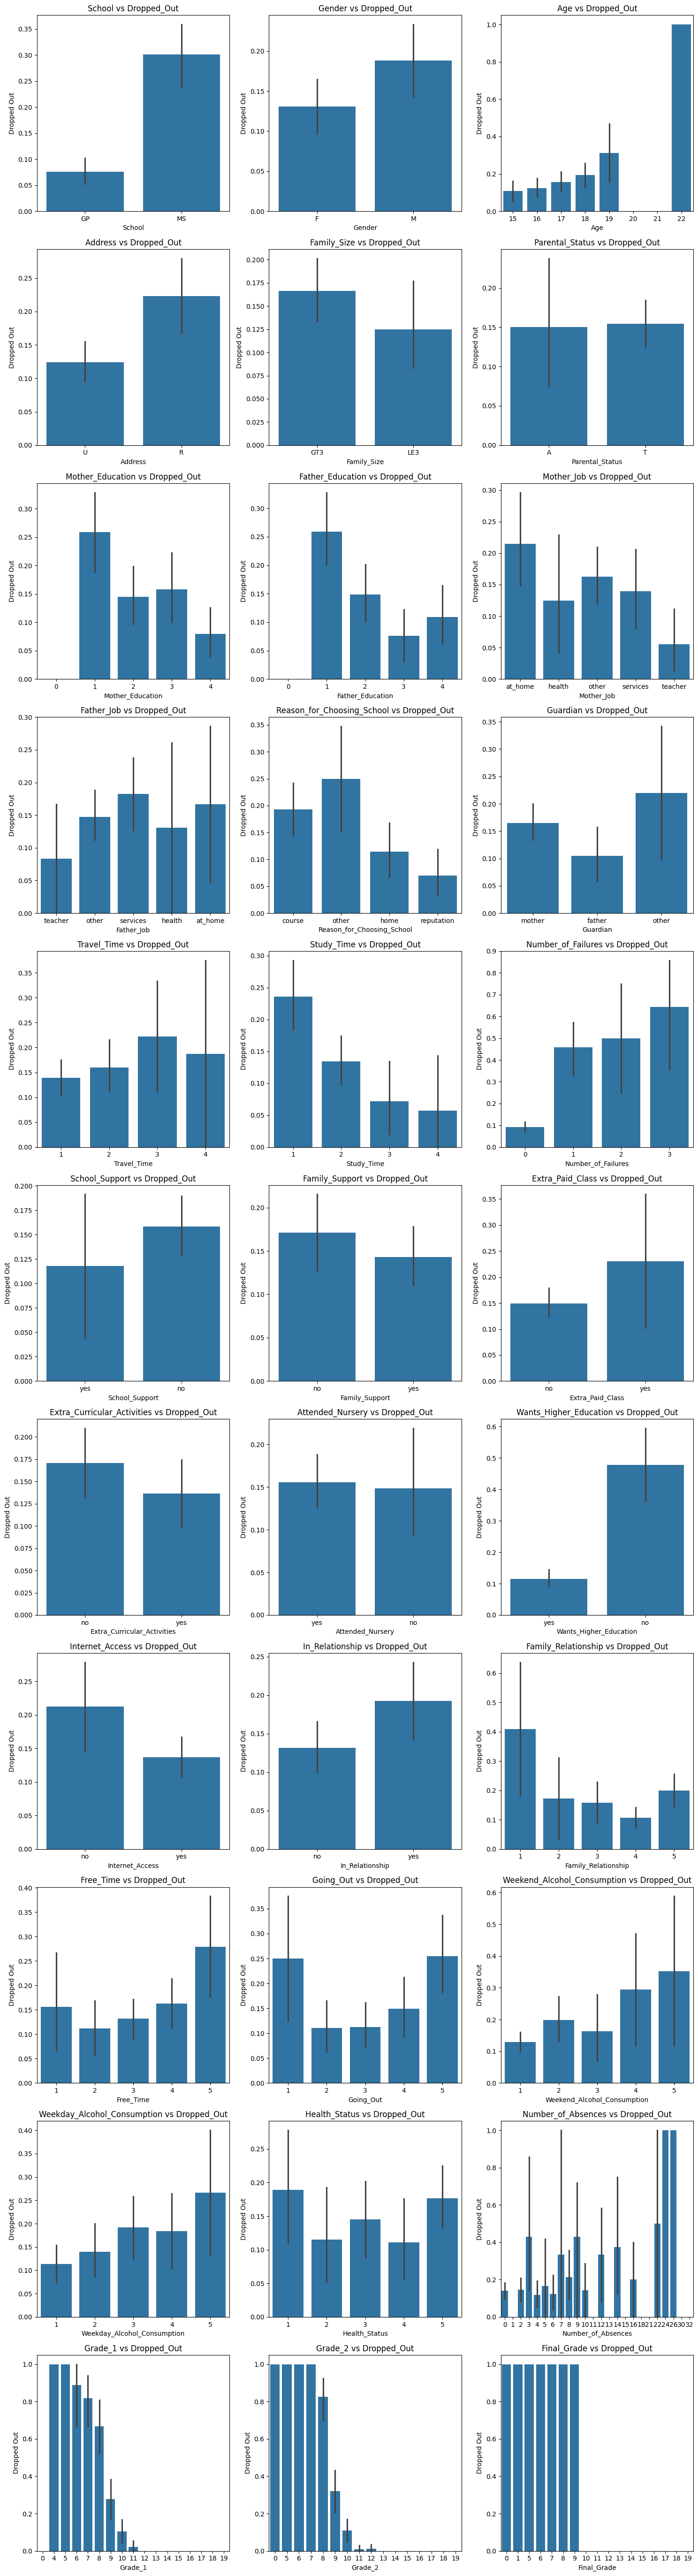

In [ ]:

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil((len(df.columns) - 1) / 3))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and create barplots
for i, col in enumerate(df.columns):
    if col == 'Dropped_Out':
      continue
    sns.barplot(data=df, x=col, y='Dropped_Out', ax=axes[i])
    axes[i].set_title(f'{col} vs Dropped_Out')
    axes[i].set_xlabel(col)  # Add x-axis label
    axes[i].set_ylabel('Dropped Out')  # Add y-axis label

# Remove empty subplots if any
if len(df.columns) % 3 != 0:
    for i in range(len(df.columns), len(axes)):
        fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

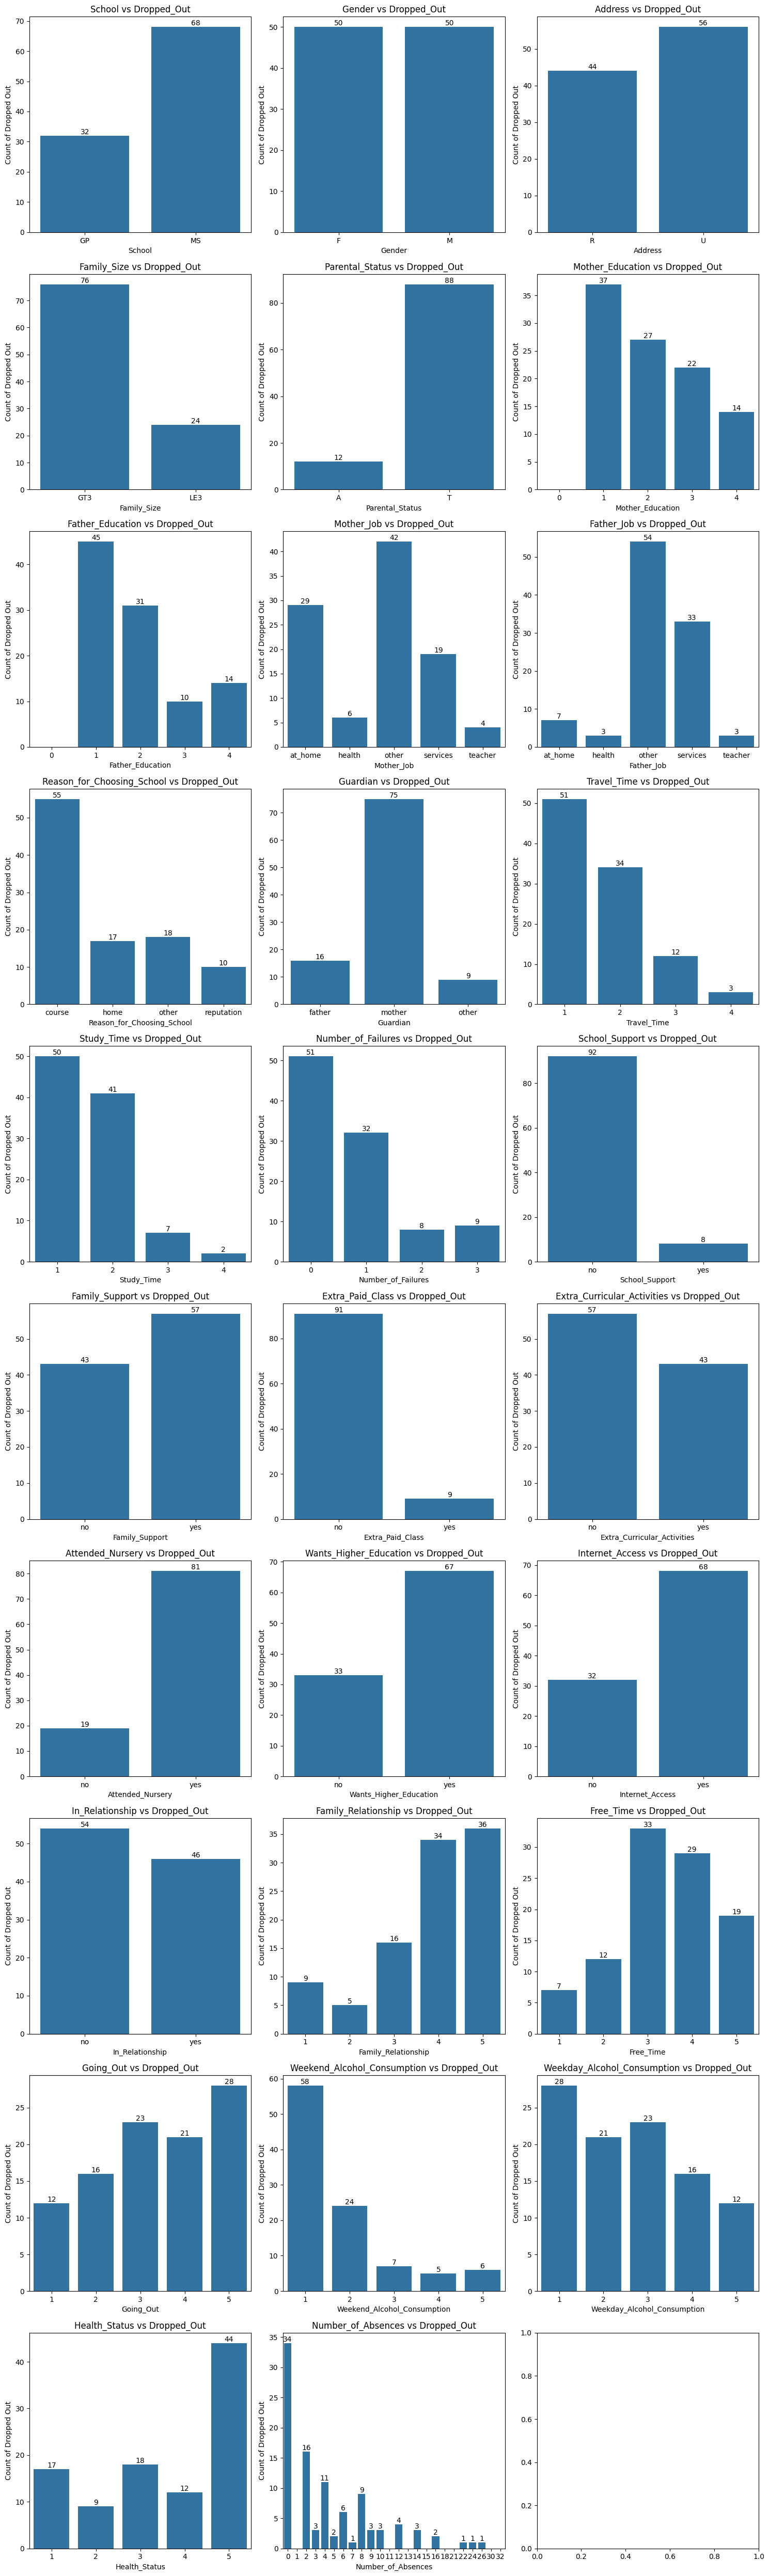

In [ ]:
# cols not included- ['Age', 'Grade_1', 'Grade_2', 'Final_Grade', 'Dropped_Out']

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil((len(df.columns) - 4) / 3))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and create barplots
i = 0
for col in df.columns:
    if col in ['Age', 'Grade_1', 'Grade_2', 'Final_Grade', 'Dropped_Out']:
        continue
    # Calculate counts for each category
    counts = df.groupby([col, 'Dropped_Out'])['Dropped_Out'].count().unstack()

    # Create a barplot
    ax = sns.barplot(data=counts, x=counts.index, y=True, ax=axes[i])
    axes[i].set_title(f'{col} vs Dropped_Out')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count of Dropped Out') # Added y-axis label

    # Add count labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    i += 1

# Remove empty subplots if any
if (len(df.columns) - 4) % 3 != 0:
    for j in range(i, len(axes)):
        fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df_obj = df[object_cols]
df_int = df[int_cols]
print(df_obj.shape, df_int.shape)


(649, 17) (649, 16)


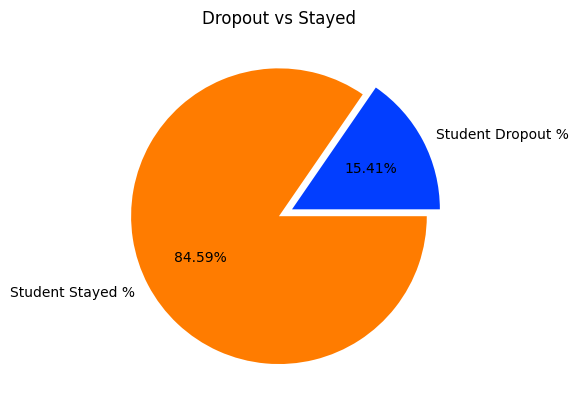

In [ ]:
# dropout vs stayed
df['Dropped_Out'].value_counts()

df1 = df['Dropped_Out'].value_counts(normalize=True)

dropped_out = round(df1.iloc[1],5)
stayed = round(df1.iloc[0],5)

# print(f'dropped_out: {dropped_out}')
# print(f'stayed: {stayed}')

# pie-chart to show distribution of target column classes
explode = (0.1,0) # 1st slice will explode

# Define your data
data = [dropped_out, stayed]
labels = ['Student Dropout %', 'Student Stayed %']

# Define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

# Create pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%0.2f%%', explode = explode)
plt.title('Dropout vs Stayed')
plt.show()


Imbalanced Dataset for Classification

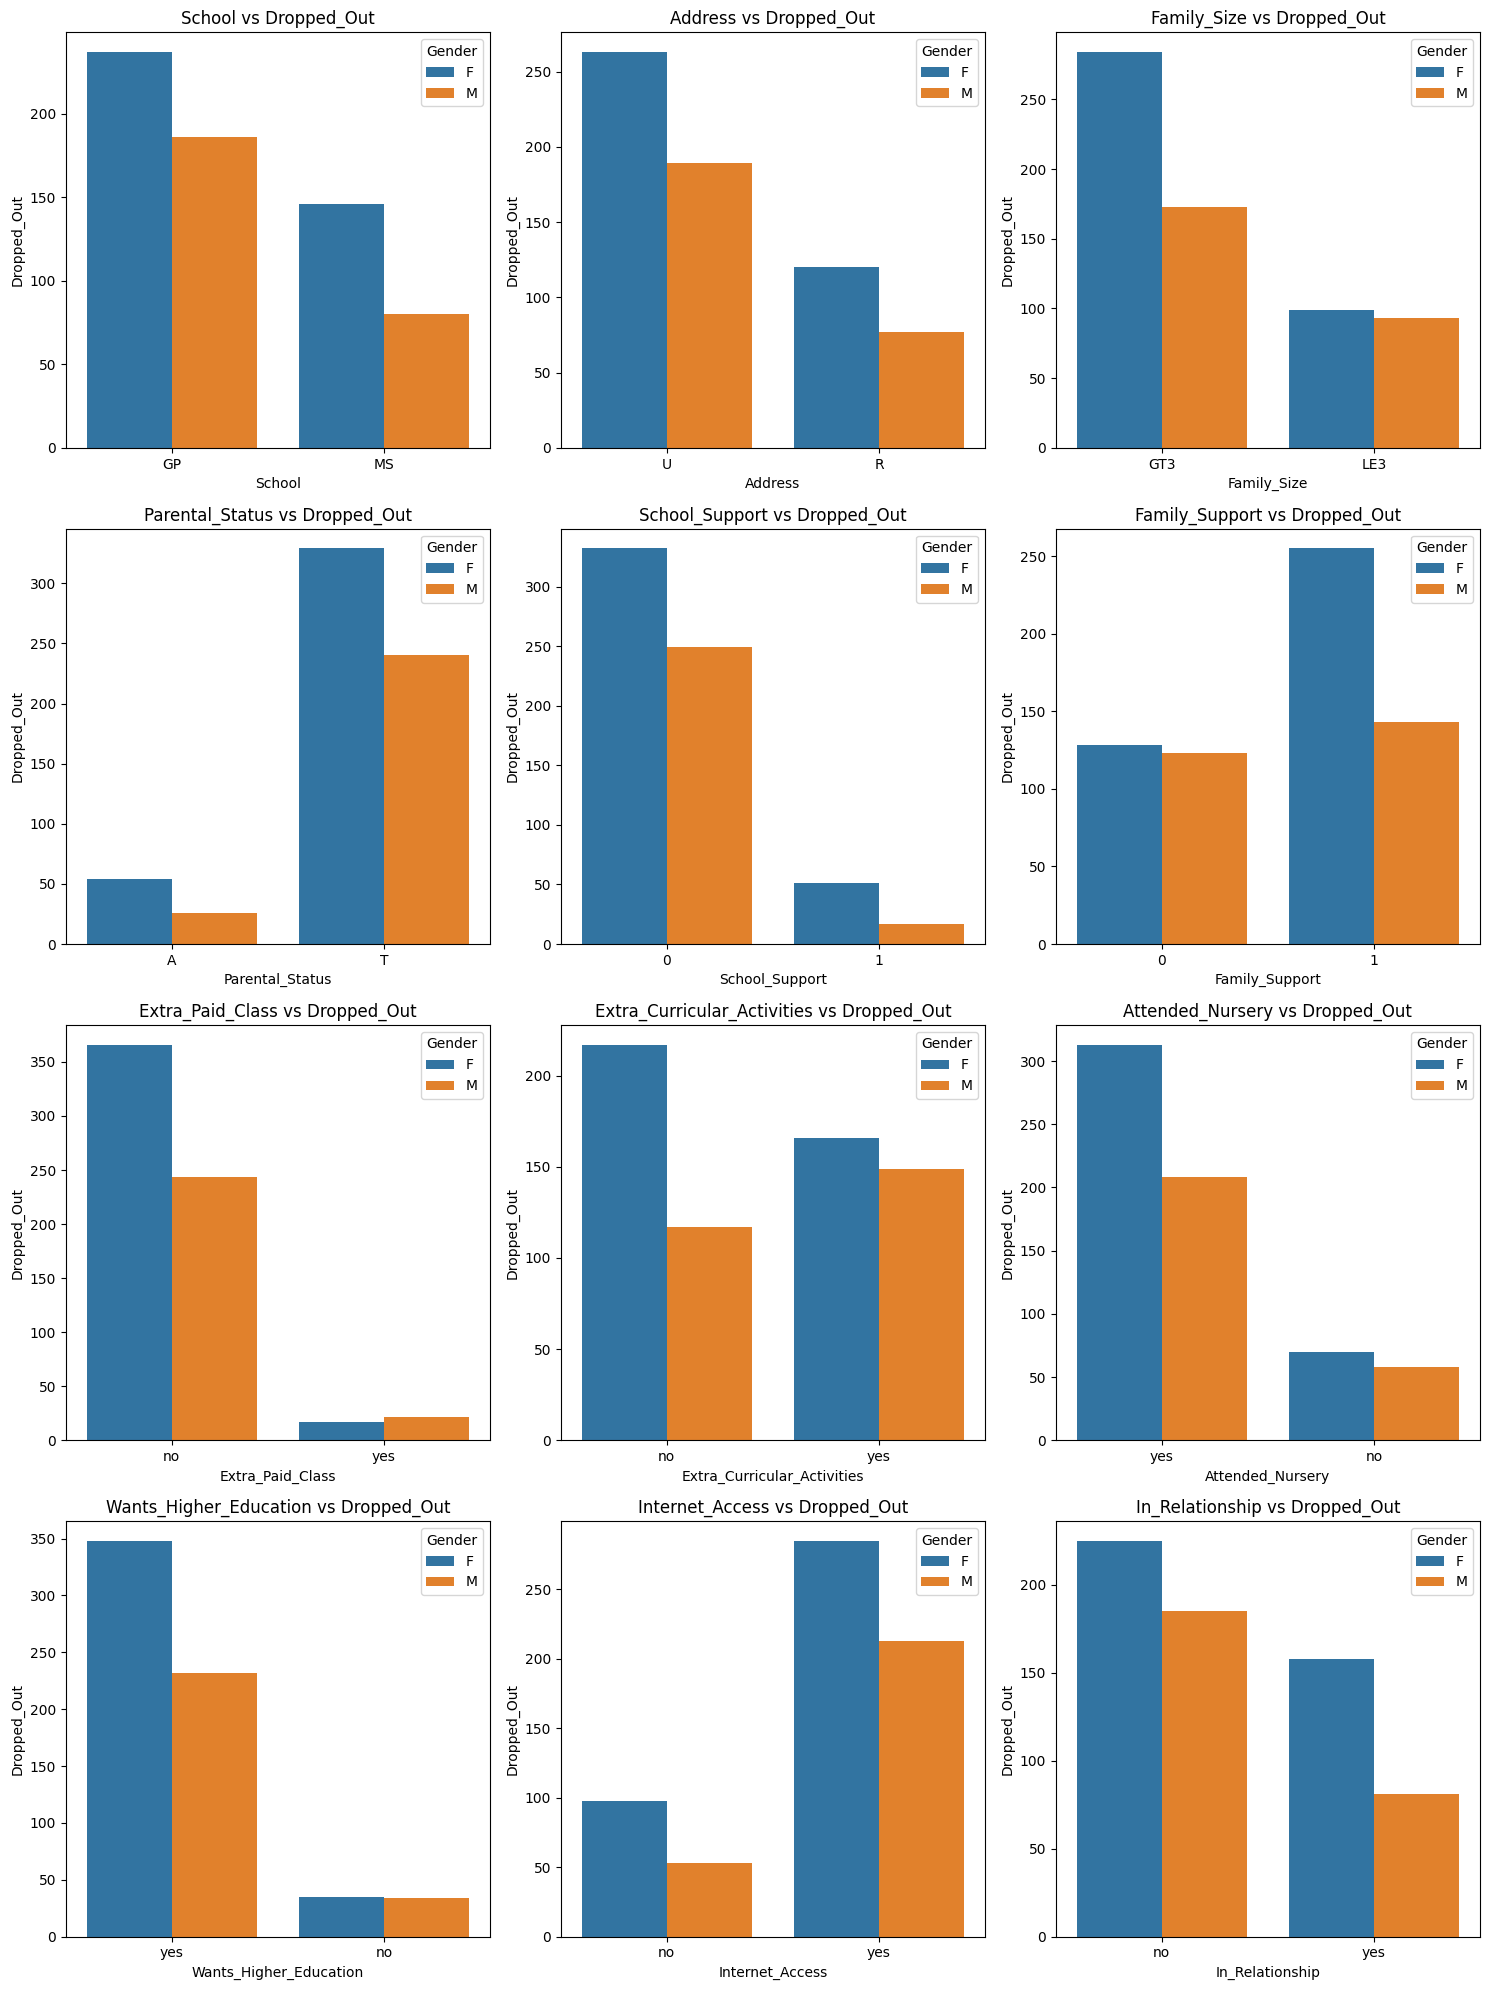

In [ ]:
# Select columns to be plotted
cols_to_plot = [col for col in df.columns if df[col].dtype != 'int64' and col not in ['Gender', 'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian', 'Dropped_Out']]

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(cols_to_plot) / 3))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate over columns and create countplots
for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, hue='Gender', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Dropped_Out')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Dropped_Out')

# Remove empty subplots if any
if len(cols_to_plot) % 3 != 0:
    for i in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

there is no such corelation between drop out and int cols

[]

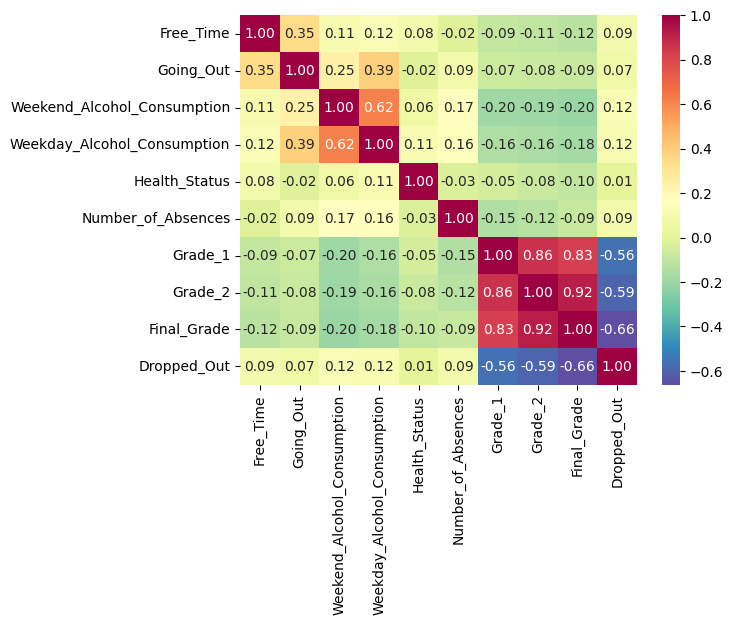

In [ ]:
h1 = ['Free_Time',	'Going_Out',	'Weekend_Alcohol_Consumption',	'Weekday_Alcohol_Consumption',	'Health_Status',	'Number_of_Absences',
'Grade_1',	'Grade_2',	'Final_Grade', 'Dropped_Out']
sns.heatmap(df[h1].corr(), annot=True, cmap='Spectral_r', fmt='.2f')
plt.plot()

In [ ]:
# run it
# if results are good do for below box also
h1 = ['Free_Time',	'Going_Out',	'Weekend_Alcohol_Consumption',	'Weekday_Alcohol_Consumption',	'Health_Status',	'Number_of_Absences',
'Grade_1',	'Grade_2',	'Final_Grade', 'Dropped_Out']
sns.barplot(data = df, x=h1, y= df[h1].corr())
plt.plot()

[]

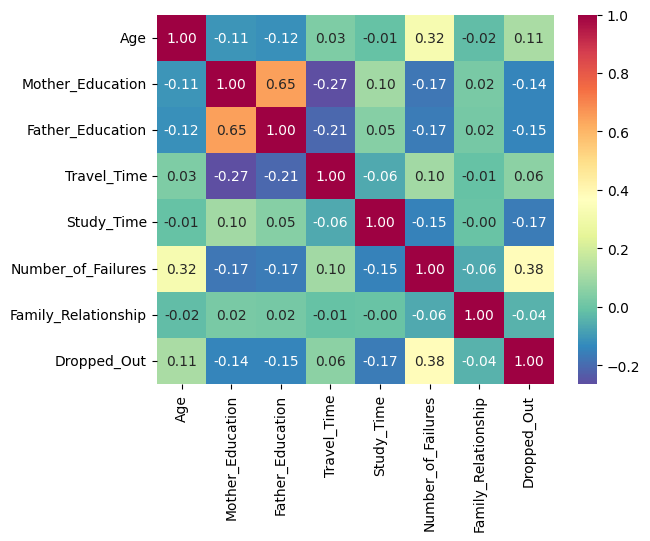

In [ ]:
h2 = ['Age','Mother_Education','Father_Education','Travel_Time','Study_Time','Number_of_Failures','Family_Relationship','Dropped_Out']
sns.heatmap(df[h2].corr(), annot=True, cmap='Spectral_r', fmt='.2f')
plt.plot()

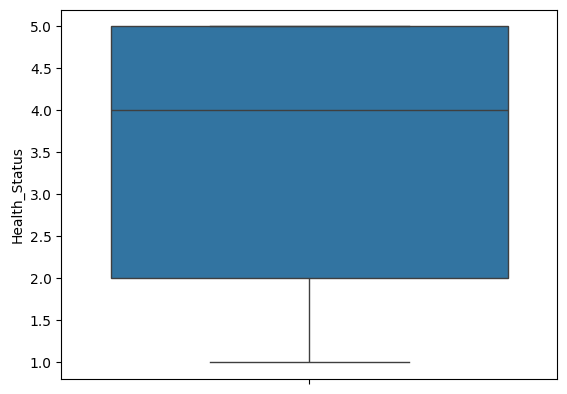

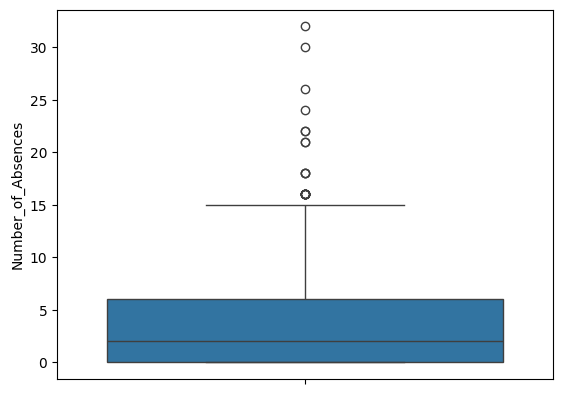

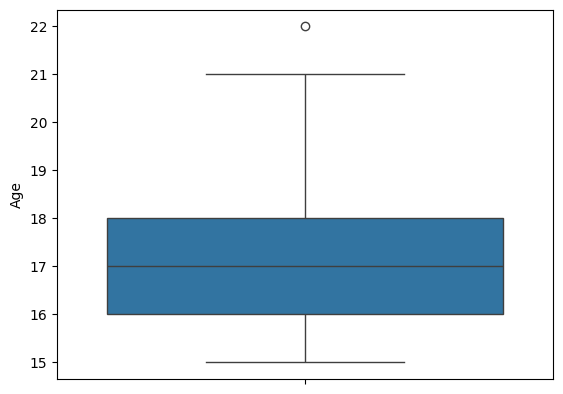

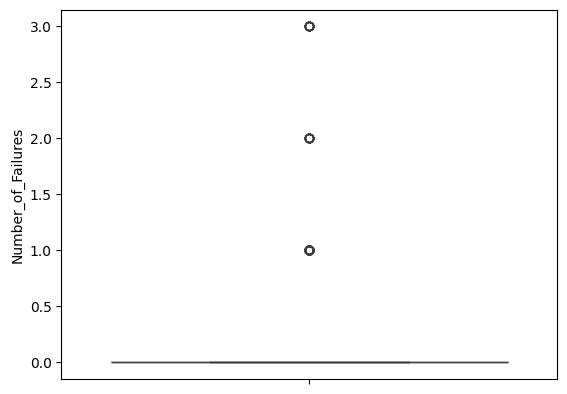

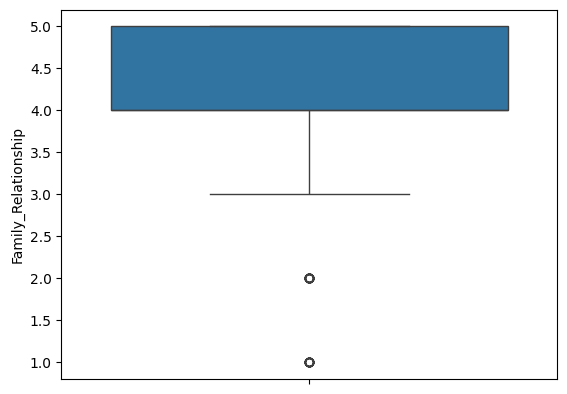

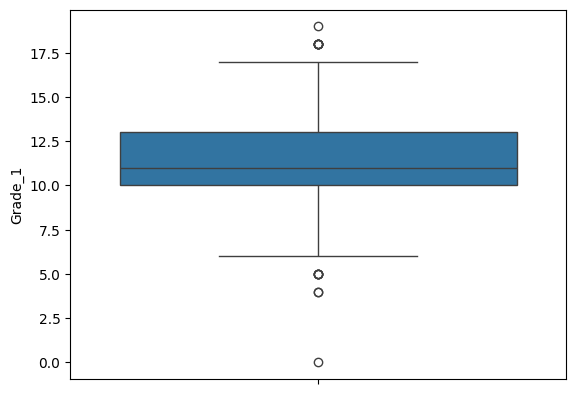

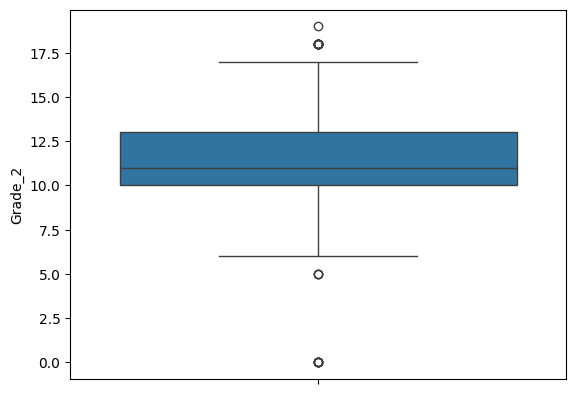

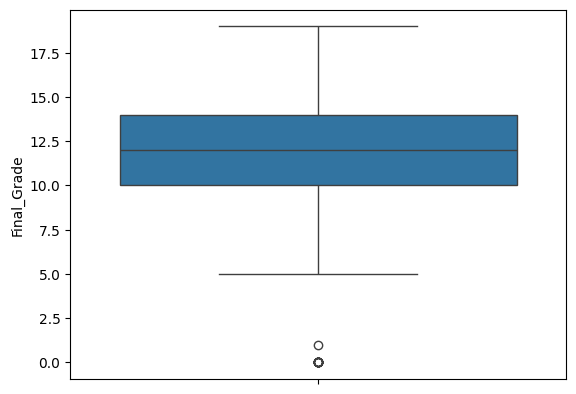

In [ ]:
# check outliers in that cols

col = ['Health_Status',	'Number_of_Absences', 'Age', 'Number_of_Failures','Family_Relationship',
'Grade_1',	'Grade_2',	'Final_Grade']

for cols in col:
  sns.boxplot(y=df[cols])
  plt.show()

crosstab and then  bar plot to plot two cat cols

check multicollinearity, annova, t or z test

Chi-Square Test for Independence,

corelation test

- Pearson’s Correlation: For linear relationships between continuous variables.
- Spearman’s Rank Correlation: For ordinal data or non-linear relationships.

for feature impportance- visit

https://machinelearningmastery.com/calculate-feature-importance-with-python/

run multiple models via krish naik video

In [ ]:
drop = df[df['Dropped_Out']==True]
stay = df[df['Dropped_Out']==False]

print(drop.shape, stay.shape)

(100, 34) (549, 34)


analyze the below graph and give conclusion

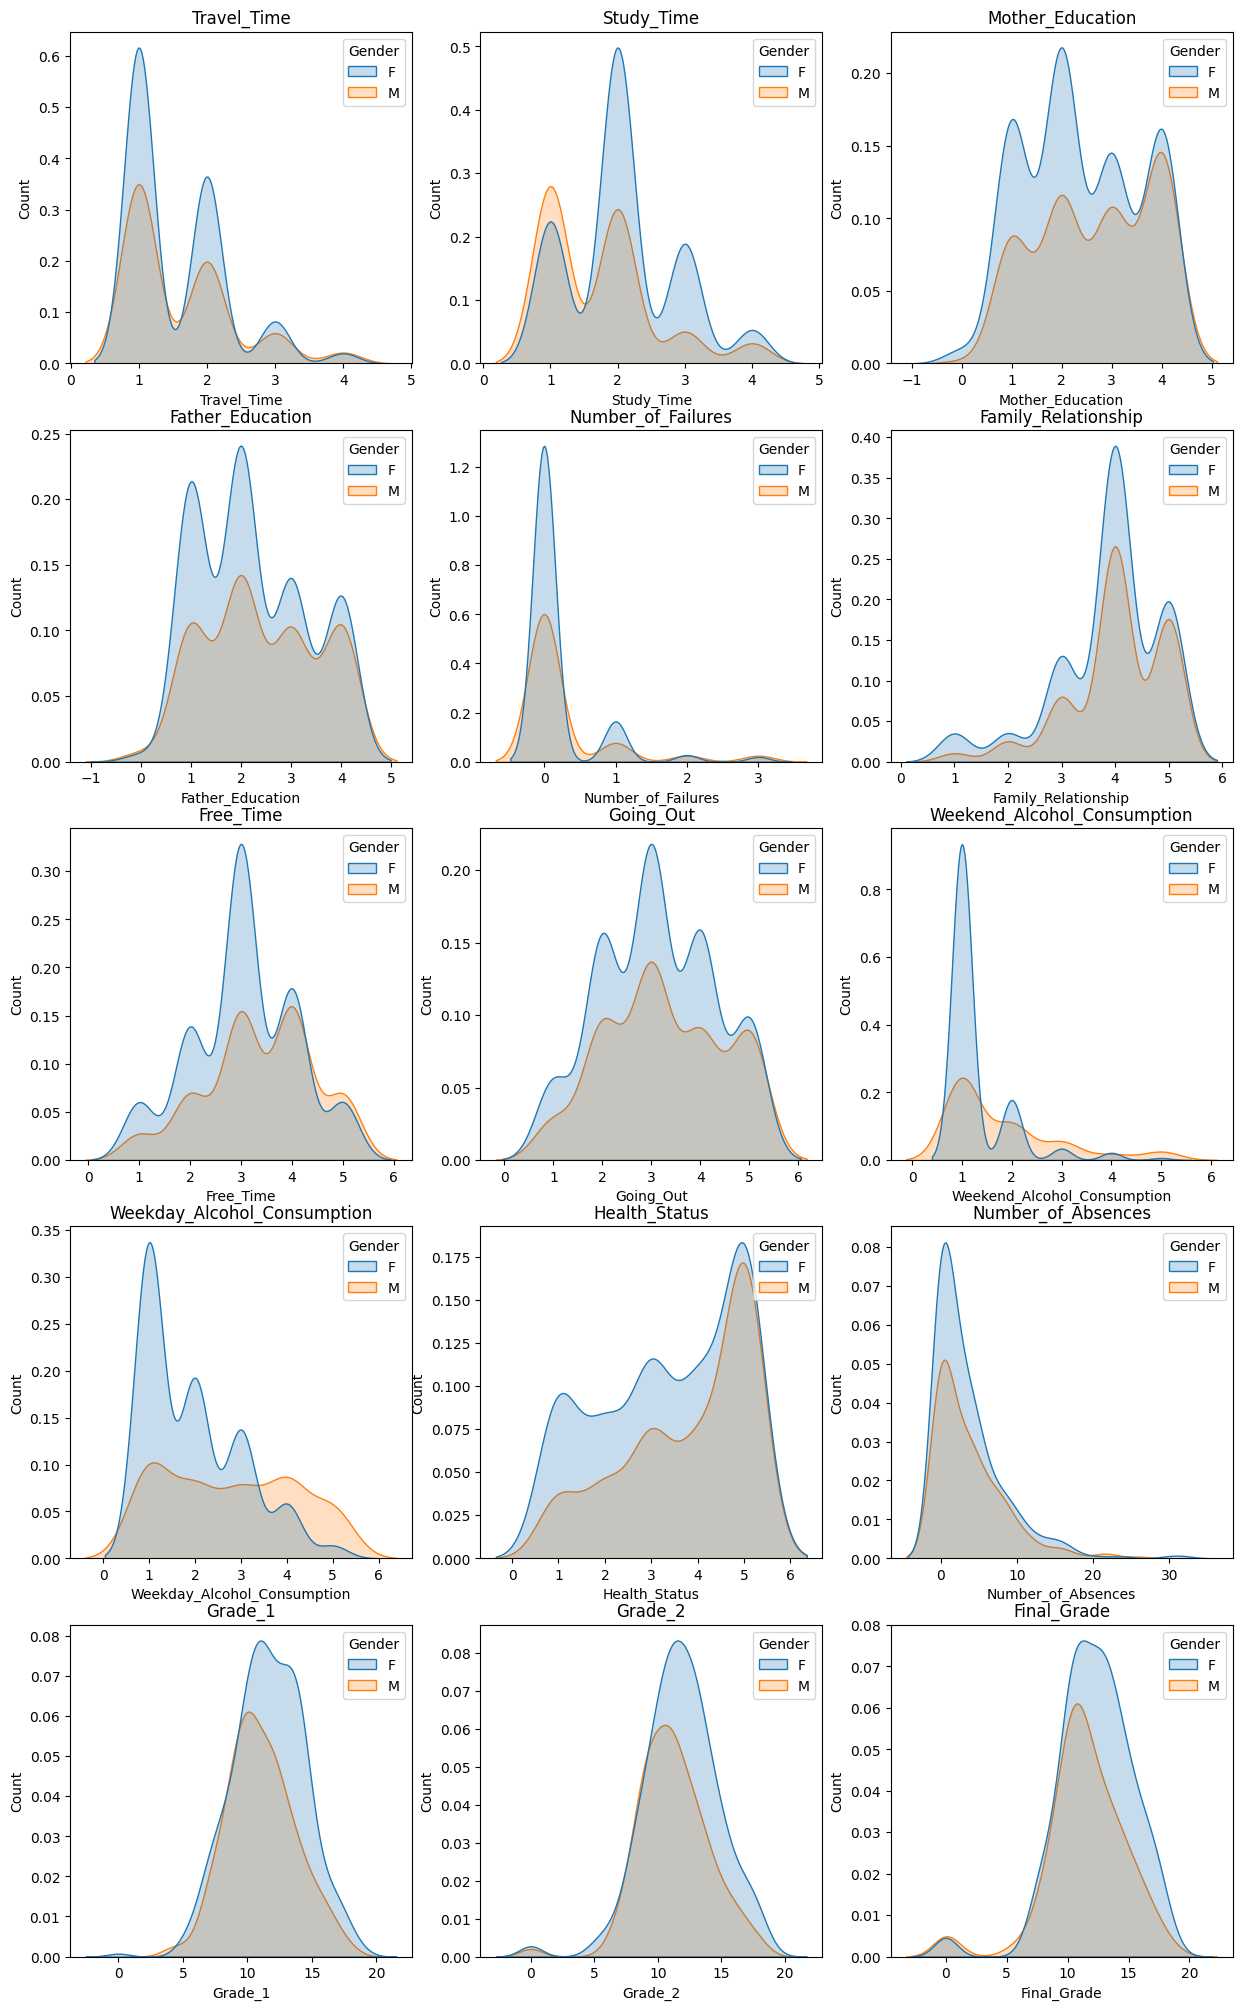

In [ ]:
# total dataset used to analyze following cols

list_col = ['Travel_Time', 'Study_Time', 'Mother_Education'
, 'Father_Education',
       'Number_of_Failures','Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade']

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(list_col) / 3))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate over columns and create countplots
for i, col in enumerate(list_col):
    sns.kdeplot(x=col, hue = df.Gender, data=df, fill=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
if len(list_col) % 3 != 0:
    for i in range(len(list_col), len(axes)):
        fig.delaxes(axes[i])

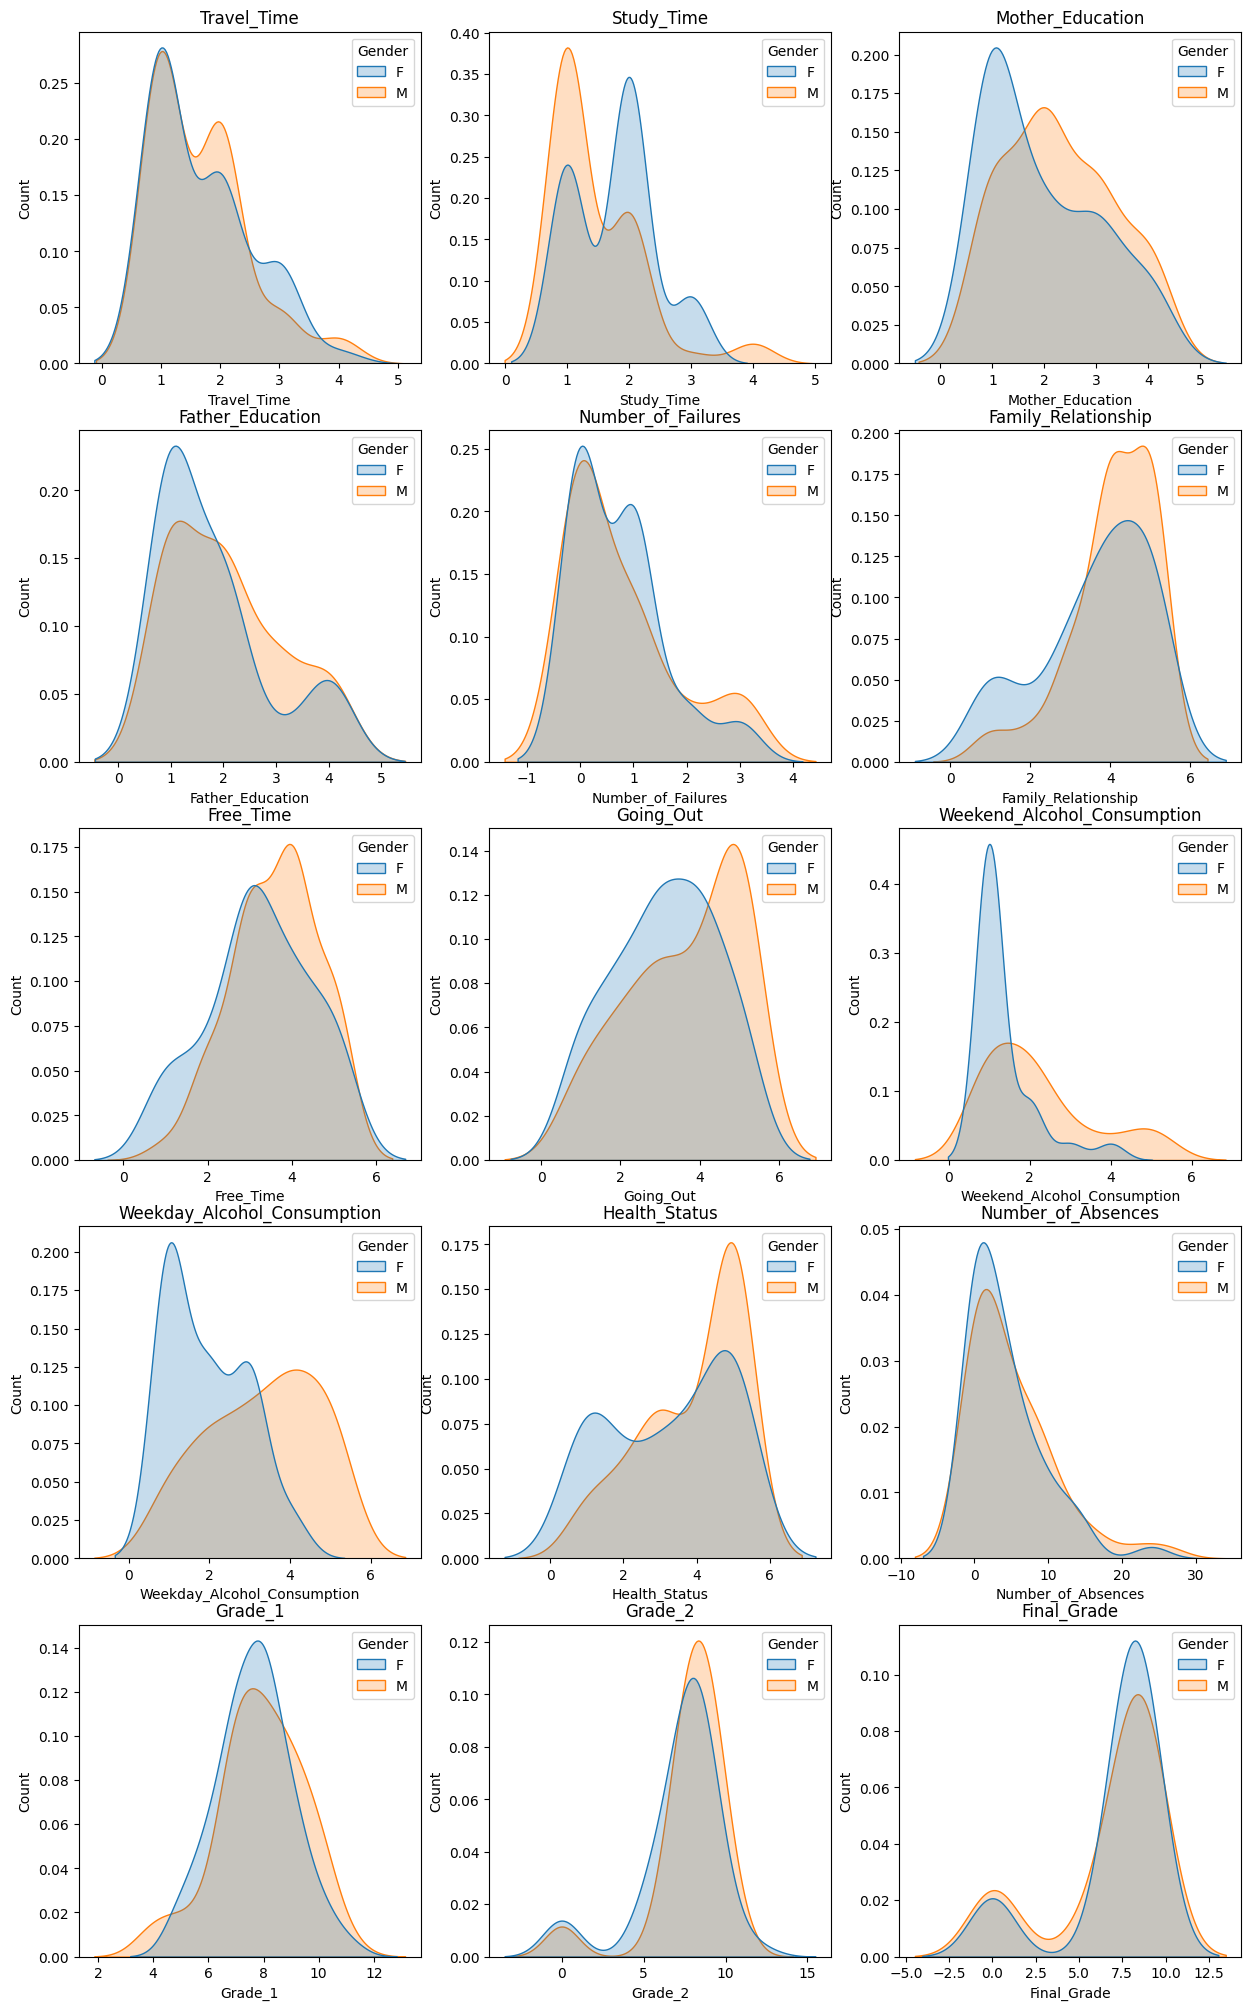

In [ ]:
# students who drop out are used to analyze following cols

drop_col = ['Travel_Time', 'Study_Time', 'Mother_Education'
, 'Father_Education',
       'Number_of_Failures','Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade']

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(drop_col) / 3))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate over columns and create countplots
for i, col in enumerate(drop_col):
    sns.kdeplot(x=col, hue = df.Gender, data=drop, fill=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
if len(drop_col) % 3 != 0:
    for i in range(len(drop_col), len(axes)):
        fig.delaxes(axes[i])

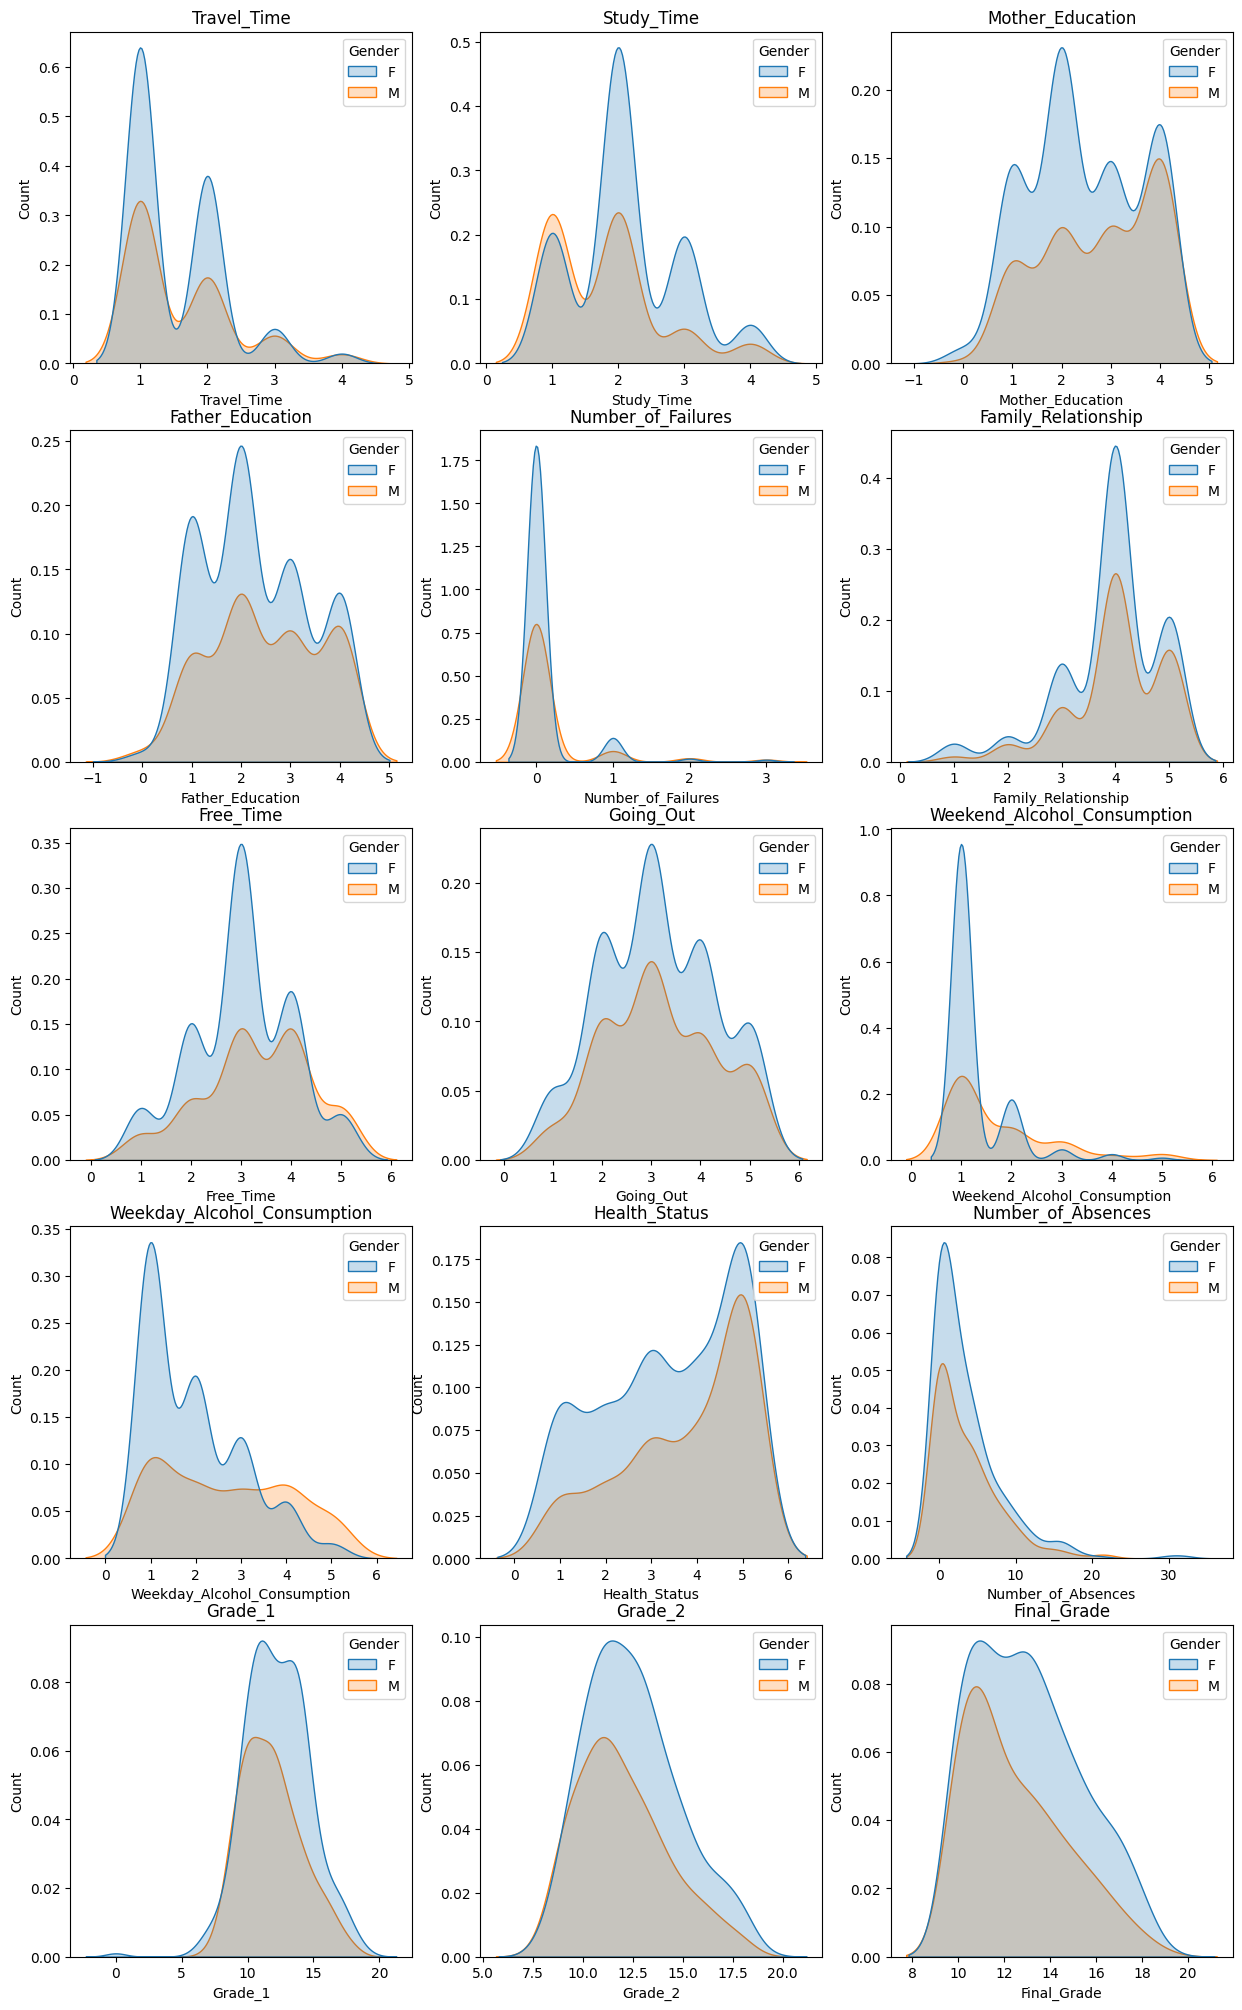

In [ ]:
# students who stayed are used to analyze following cols

stay_col = ['Travel_Time', 'Study_Time', 'Mother_Education'
, 'Father_Education',
       'Number_of_Failures','Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade']

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(stay_col) / 3))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate over columns and create countplots
for i, col in enumerate(stay_col):
    sns.kdeplot(x=col, hue = df.Gender, data=stay, fill=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
if len(stay_col) % 3 != 0:
    for i in range(len(stay_col), len(axes)):
        fig.delaxes(axes[i])

In [ ]:
for col in list_col:
  print(f'{col}: {round(drop[col].skew(), 3)}')

Travel_Time: 1.03
Study_Time: 1.075
Mother_Education: 0.443
Father_Education: 0.876
Number_of_Failures: 1.179
Family_Relationship: -1.027
Free_Time: -0.361
Going_Out: -0.309
Weekend_Alcohol_Consumption: 1.605
Weekday_Alcohol_Consumption: 0.309
Health_Status: -0.564
Number_of_Absences: 1.67
Grade_1: -0.219
Grade_2: -1.974
Final_Grade: -1.64


In [ ]:
for col in list_col:
  print(f'{col}: {round(stay[col].skew(), 3)}')

Travel_Time: 1.294
Study_Time: 0.639
Mother_Education: -0.116
Father_Education: 0.111
Number_of_Failures: 4.196
Family_Relationship: -1.058
Free_Time: -0.169
Going_Out: 0.045
Weekend_Alcohol_Consumption: 2.25
Weekday_Alcohol_Consumption: 0.699
Health_Status: -0.49
Number_of_Absences: 2.089
Grade_1: 0.09
Grade_2: 0.543
Final_Grade: 0.56
